In [1]:
from sklearn.datasets import load_iris

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


In [2]:
iris = load_iris()

In [5]:
X = iris.data
y = iris.target

In [7]:
type(y)

numpy.ndarray

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.4, random_state=1)

In [11]:
X_test.shape

(60, 4)

In [12]:
from sklearn.neighbors import KNeighborsClassifier

In [13]:
knn = KNeighborsClassifier(n_neighbors=3)

In [14]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [16]:
previsione = knn.predict(X_test)

In [17]:
from sklearn import metrics

In [18]:
metrics.accuracy_score(previsione, y_test)

0.9833333333333333

In [19]:
from sklearn.model_selection import cross_val_score

In [22]:
score = cross_val_score(knn, X, y, cv = 10, scoring="accuracy")

In [23]:
score

array([1.        , 0.93333333, 1.        , 0.93333333, 0.86666667,
       1.        , 0.93333333, 1.        , 1.        , 1.        ])

In [24]:
score.mean()

0.9666666666666666

In [25]:
score.std()

0.04472135954999579

In [30]:
scores = []
for i in range(1, 31): 
    knn = KNeighborsClassifier(n_neighbors=i)
    score = cross_val_score(knn, X, y, cv = 10, scoring="accuracy")
    mi = score.mean()
    scores.append(mi)

In [31]:
import matplotlib.pyplot as plt

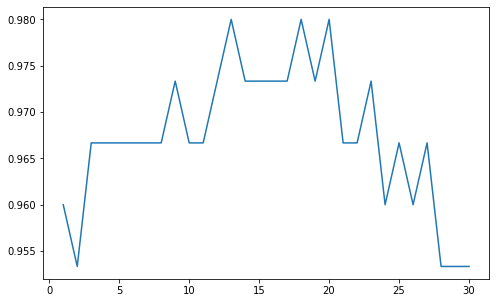

In [32]:
plt.figure(figsize= (8, 5))
plt.plot(range(1, 31), scores)
plt.show()

#### Uso GridSearchCV per trovare i parametri ottimi

In [33]:
from sklearn.model_selection import GridSearchCV

In [34]:
k_range = list(range(1, 31))

In [35]:
print(k_range)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]


In [38]:
param_grid = dict(n_neighbors = k_range)

In [40]:
grid = GridSearchCV(knn, param_grid, cv = 5, scoring="accuracy")

In [41]:
grid

GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=30),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30]},
             scoring='accuracy')

In [42]:
grid.fit(X, y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=30),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30]},
             scoring='accuracy')

In [45]:
import pandas as pd
data_grid = pd.DataFrame(grid.cv_results_)

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


In [47]:
data_grid

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001204,0.000396,0.002795,0.000739,1,{'n_neighbors': 1},0.966667,0.966667,0.933333,0.933333,1.0,0.960000,0.024944,19
1,0.000800,0.000400,0.002600,0.000801,2,{'n_neighbors': 2},0.966667,0.933333,0.933333,0.900000,1.0,0.946667,0.033993,26
2,0.000802,0.000401,0.002595,0.000492,3,{'n_neighbors': 3},0.966667,0.966667,0.933333,0.966667,1.0,0.966667,0.021082,10
3,0.001197,0.000398,0.002805,0.000748,4,{'n_neighbors': 4},0.966667,0.966667,0.966667,0.966667,1.0,0.973333,0.013333,6
4,0.000797,0.000399,0.002199,0.000396,5,{'n_neighbors': 5},0.966667,1.000000,0.933333,0.966667,1.0,0.973333,0.024944,6
5,0.000603,0.000493,0.002206,0.000396,6,{'n_neighbors': 6},0.966667,1.000000,0.966667,0.966667,1.0,0.980000,0.016330,1
6,0.000794,0.000397,0.002798,0.000749,7,{'n_neighbors': 7},0.966667,1.000000,0.966667,0.966667,1.0,0.980000,0.016330,1
7,0.001001,0.000636,0.002795,0.000397,8,{'n_neighbors': 8},0.966667,1.000000,0.933333,0.933333,1.0,0.966667,0.029814,10
8,0.001202,0.000398,0.002196,0.000397,9,{'n_neighbors': 9},0.966667,1.000000,0.966667,0.933333,1.0,0.973333,0.024944,6
9,0.001001,0.000004,0.001999,0.000003,10,{'n_neighbors': 10},0.966667,1.000000,1.000000,0.933333,1.0,0.980000,0.026667,1


In [49]:
dati_scoring = data_grid[["params", "mean_test_score", "std_test_score", "rank_test_score"]]

In [51]:
dati_scoring.sort_values("rank_test_score")

,params,mean_test_score,std_test_score,rank_test_score
10,{'n_neighbors': 11},0.980000,0.026667,1
5,{'n_neighbors': 6},0.980000,0.016330,1
6,{'n_neighbors': 7},0.980000,0.016330,1
9,{'n_neighbors': 10},0.980000,0.026667,1
11,{'n_neighbors': 12},0.980000,0.026667,1
3,{'n_neighbors': 4},0.973333,0.013333,6
4,{'n_neighbors': 5},0.973333,0.024944,6
8,{'n_neighbors': 9},0.973333,0.024944,6
12,{'n_neighbors': 13},0.973333,0.024944,6
18,{'n_neighbors': 19},0.966667,0.029814,10
